In [86]:
import pandas as pd

yanapaybd=pd.read_excel("AvanceDetalladoDelBonoYanapay.xlsx",3)
yanapaybd.columns

Index(['BD', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'GENERO',
       'MODALIDAD_FINAL', 'IDMODALIDAD', 'MODALIDAD_MOSTRAR', 'AREA',
       'PROGRAMADO', 'EJECUTADO', 'GRUPO', 'FECHA_ACTUALIZACION'],
      dtype='object')

In [107]:
yanapayDis=yanapaybd.groupby(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']).agg({'PROGRAMADO': 'sum','EJECUTADO':'sum'})
yanapayDis

,,,,PROGRAMADO,EJECUTADO
UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,,
10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126
10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176
10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790
10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490
10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486
...,...,...,...,...,...
250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822
250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567
250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731


In [110]:
yanapayDis.reset_index(inplace=True)
yanapayDis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486
...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017


In [111]:
yanapayDis.to_csv("yanapayDis.csv",index=False)

In [95]:
congre=pd.read_csv("Congresal_total_eg2021.csv",sep=';')

In [147]:
congre.DESCRIP_ESTADO_ACTA.value_counts()

CONTABILIZADA             1478689
COMPUTADA RESUELTA         324547
ANULADA                     46043
SIN INSTALAR                10478
ACTA RESUELTA                 780
ACTA ANULADA                  667
ANULADA POR EXTRAVIADA        192
Name: DESCRIP_ESTADO_ACTA, dtype: int64

In [151]:
congre=congre[congre.DESCRIP_ESTADO_ACTA.isin(['CONTABILIZADA','COMPUTADA RESUELTA','ACTA RESUELTA'])]

In [ ]:
len(set(congre.DEPARTAMENTO )& set(yanapayDis.DEPARTAMENTO))

In [152]:
congreDis=congre[congre.DEPARTAMENTO.isin(yanapayDis.DEPARTAMENTO)]
congreDis.reset_index(inplace=True)
congreDis.columns

Index(['index', 'UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'TIPO_ELECCION', 'MESA_DE_VOTACION', 'DESCRIP_ESTADO_ACTA',
       'TIPO_OBSERVACION', 'UBICACION_EN_CEDULA', 'CODIGO_OP',
       'DESCRIPCION_OP', 'N_TOTAL_VOTOS', 'N_VOTOS_1', 'N_VOTOS_2',
       'N_VOTOS_3', 'N_VOTOS_4', 'N_VOTOS_5', 'N_VOTOS_6', 'N_VOTOS_7',
       'N_VOTOS_8', 'N_VOTOS_9', 'N_VOTOS_10', 'N_VOTOS_11', 'N_VOTOS_12',
       'N_VOTOS_13', 'N_VOTOS_14', 'N_VOTOS_15', 'N_VOTOS_16', 'N_VOTOS_17',
       'N_VOTOS_18', 'N_VOTOS_19', 'N_VOTOS_20', 'N_VOTOS_21', 'N_VOTOS_22',
       'N_VOTOS_23', 'N_VOTOS_24', 'N_VOTOS_25', 'N_VOTOS_26', 'N_VOTOS_27',
       'N_VOTOS_28', 'N_VOTOS_29', 'N_VOTOS_30', 'N_VOTOS_31', 'N_VOTOS_32',
       'N_VOTOS_33', 'N_VOTOS_34', 'N_CVAS', 'N_ELEC_HABIL'],
      dtype='object')

In [156]:
congreDis.DESCRIPCION_OP.value_counts()

FRENTE POPULAR AGRICOLA FIA DEL PERU - FREPAP     81118
FUERZA POPULAR                                    81118
VOTOS IMPUGNADOS                                  81118
VOTOS NULOS                                       81118
VOTOS EN BLANCO                                   81118
ALIANZA PARA EL PROGRESO                          81118
PARTIDO NACIONALISTA PERUANO                      81118
RENOVACION POPULAR                                81118
PODEMOS PERU                                      81118
ACCION POPULAR                                    81118
VICTORIA NACIONAL                                 81118
PARTIDO MORADO                                    81118
PARTIDO DEMOCRATICO SOMOS PERU                    80724
JUNTOS POR EL PERU                                80599
PARTIDO POPULAR CRISTIANO - PPC                   79634
RENACIMIENTO UNIDO NACIONAL                       79096
UNION POR EL PERU                                 77343
DEMOCRACIA DIRECTA                              

In [166]:
unidades=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO','DESCRIPCION_OP']
congreDisPartidos=congreDis.groupby(unidades).agg({'N_TOTAL_VOTOS':'sum'})
congreDisPartidos.reset_index(inplace=True)
unidades2=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']
congreDisPartidosL=pd.pivot_table(congreDisPartidos,
                            values=['N_TOTAL_VOTOS'], 
                            index=unidades2,
                            columns=['DESCRIPCION_OP'],
                                 aggfunc=sum)


N_TOTAL_VOTOS  \
DESCRIPCION_OP                              ACCION POPULAR   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                     
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS          832.0   
10102  AMAZONAS     CHACHAPOYAS ASUNCION              17.0   
10103  AMAZONAS     CHACHAPOYAS BALSAS                60.0   
10104  AMAZONAS     CHACHAPOYAS CHETO                 38.0   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN             24.0   
...                                                    ...   
250301 UCAYALI      ATALAYA     RAIMONDI            1302.0   
250302 UCAYALI      ATALAYA     TAHUANIA             324.0   
250303 UCAYALI      ATALAYA     YURUA                 38.0   
250304 UCAYALI      ATALAYA     SEPAHUA              337.0   
250401 UCAYALI      PURUS       PURUS                 35.0   

                                                                      \
DESCRIPCION_OP                              ALIANZA PARA EL PROGRESO   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                               
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS                   1336.0   
10102  AMAZONAS     CHACHAPOYAS ASUNCION                         7.0   
10103  AMAZONAS     CHACHAPOYAS BALSAS                          30.0   
10104  AMAZONAS     CHACHAPOYAS CHETO                           26.0   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN                       15.0   
...                                                              ...   
250301 UCAYALI      ATALAYA     RAIMONDI                       212.0   
250302 UCAYALI      ATALAYA     TAHUANIA                       113.0   
250303 UCAYALI      ATALAYA     YURUA                           55.0   
250304 UCAYALI      ATALAYA     SEPAHUA                        150.0   
250401 UCAYALI      PURUS       PURUS                          391.0   

                                                                                         \
DESCRIPCION_OP                              AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                                                  
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS                                         NaN   
10102  AMAZONAS     CHACHAPOYAS ASUNCION                                            NaN   
10103  AMAZONAS     CHACHAPOYAS BALSAS                                              NaN   
10104  AMAZONAS     CHACHAPOYAS CHETO                                               NaN   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN                                           NaN   
...                                                                                 ...   
250301 UCAYALI      ATALAYA     RAIMONDI                                            NaN   
250302 UCAYALI      ATALAYA     TAHUANIA                                            NaN   
250303 UCAYALI      ATALAYA     YURUA                                               NaN   
250304 UCAYALI      ATALAYA     SEPAHUA                                             NaN   
250401 UCAYALI      PURUS       PURUS                                               NaN   

                                                                \
DESCRIPCION_OP                              DEMOCRACIA DIRECTA   
UBIGEO DEPARTAMENTO PROVINCIA   DISTRITO                         
10101  AMAZONAS     CHACHAPOYAS CHACHAPOYAS               27.0   
10102  AMAZONAS     CHACHAPOYAS ASUNCION                   0.0   
10103  AMAZONAS     CHACHAPOYAS BALSAS                     0.0   
10104  AMAZONAS     CHACHAPOYAS CHETO                      0.0   
10105  AMAZONAS     CHACHAPOYAS CHILIQUIN                  1.0   
...                                                        ...   
250301 UCAYALI      ATALAYA     RAIMONDI                   NaN   
250302 UCAYALI      ATALAYA     TAHUANIA                   NaN   
250303 UCAYALI      ATALAYA     YURUA                      NaN   
250304 UCAYALI      ATALAYA     SEPAHUA                    NaN   
250401 UCAYALI      PURUS       PU

In [170]:
congreDisPartidosL.columns=[b for a,b in congreDisPartidosL.columns]

,,,,ACCION POPULAR,ALIANZA PARA EL PROGRESO,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,DEMOCRACIA DIRECTA,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",FRENTE POPULAR AGRICOLA FIA DEL PERU - FREPAP,FUERZA POPULAR,JUNTOS POR EL PERU,PARTIDO DEMOCRATICO SOMOS PERU,PARTIDO MORADO,...,PARTIDO POPULAR CRISTIANO - PPC,PERU PATRIA SEGURA,PODEMOS PERU,RENACIMIENTO UNIDO NACIONAL,RENOVACION POPULAR,UNION POR EL PERU,VICTORIA NACIONAL,VOTOS EN BLANCO,VOTOS IMPUGNADOS,VOTOS NULOS
UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,,,,,,,,,,,,,,,,,,,,,
10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,832.0,1336.0,NaN,27.0,391.0,127.0,711.0,1218.0,1289.0,661.0,...,67.0,NaN,398.0,34.0,577.0,97.0,511.0,2149.0,0.0,2169.0
10102,AMAZONAS,CHACHAPOYAS,ASUNCION,17.0,7.0,NaN,0.0,0.0,0.0,6.0,5.0,5.0,2.0,...,0.0,NaN,0.0,1.0,4.0,1.0,3.0,22.0,0.0,20.0
10103,AMAZONAS,CHACHAPOYAS,BALSAS,60.0,30.0,NaN,0.0,5.0,15.0,54.0,25.0,24.0,6.0,...,3.0,NaN,8.0,1.0,19.0,1.0,20.0,88.0,0.0,36.0
10104,AMAZONAS,CHACHAPOYAS,CHETO,38.0,26.0,NaN,0.0,58.0,1.0,19.0,23.0,15.0,8.0,...,3.0,NaN,1.0,0.0,15.0,3.0,7.0,112.0,0.0,48.0
10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,24.0,15.0,NaN,1.0,7.0,0.0,59.0,15.0,13.0,3.0,...,0.0,NaN,3.0,2.0,3.0,3.0,3.0,90.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,UCAYALI,ATALAYA,RAIMONDI,1302.0,212.0,NaN,NaN,NaN,456.0,1470.0,515.0,151.0,50.0,...,2083.0,NaN,133.0,43.0,171.0,110.0,90.0,2638.0,0.0,2779.0
250302,UCAYALI,ATALAYA,TAHUANIA,324.0,113.0,NaN,NaN,NaN,38.0,315.0,250.0,167.0,16.0,...,52.0,NaN,29.0,35.0,28.0,19.0,33.0,789.0,0.0,392.0
250303,UCAYALI,ATALAYA,YURUA,38.0,55.0,NaN,NaN,NaN,0.0,124.0,0.0,5.0,0.0,...,0.0,NaN,0.0,1.0,2.0,0.0,2.0,87.0,0.0,70.0


In [172]:
congreDisPartidosL.reset_index(inplace=True)

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,ACCION POPULAR,ALIANZA PARA EL PROGRESO,AVANZA PAIS - PARTIDO DE INTEGRACION SOCIAL,DEMOCRACIA DIRECTA,"EL FRENTE AMPLIO POR JUSTICIA, VIDA Y LIBERTAD",FRENTE POPULAR AGRICOLA FIA DEL PERU - FREPAP,...,PARTIDO POPULAR CRISTIANO - PPC,PERU PATRIA SEGURA,PODEMOS PERU,RENACIMIENTO UNIDO NACIONAL,RENOVACION POPULAR,UNION POR EL PERU,VICTORIA NACIONAL,VOTOS EN BLANCO,VOTOS IMPUGNADOS,VOTOS NULOS
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,832.0,1336.0,NaN,27.0,391.0,127.0,...,67.0,NaN,398.0,34.0,577.0,97.0,511.0,2149.0,0.0,2169.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,17.0,7.0,NaN,0.0,0.0,0.0,...,0.0,NaN,0.0,1.0,4.0,1.0,3.0,22.0,0.0,20.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,60.0,30.0,NaN,0.0,5.0,15.0,...,3.0,NaN,8.0,1.0,19.0,1.0,20.0,88.0,0.0,36.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,38.0,26.0,NaN,0.0,58.0,1.0,...,3.0,NaN,1.0,0.0,15.0,3.0,7.0,112.0,0.0,48.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,24.0,15.0,NaN,1.0,7.0,0.0,...,0.0,NaN,3.0,2.0,3.0,3.0,3.0,90.0,0.0,54.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250301,UCAYALI,ATALAYA,RAIMONDI,1302.0,212.0,NaN,NaN,NaN,456.0,...,2083.0,NaN,133.0,43.0,171.0,110.0,90.0,2638.0,0.0,2779.0
1870,250302,UCAYALI,ATALAYA,TAHUANIA,324.0,113.0,NaN,NaN,NaN,38.0,...,52.0,NaN,29.0,35.0,28.0,19.0,33.0,789.0,0.0,392.0
1871,250303,UCAYALI,ATALAYA,YURUA,38.0,55.0,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,1.0,2.0,0.0,2.0,87.0,0.0,70.0
1872,250304,UCAYALI,ATALAYA,SEPAHUA,337.0,150.0,NaN,NaN,NaN,288.0,...,50.0,NaN,52.0,5.0,19.0,12.0,48.0,587.0,0.0,301.0


In [179]:
congreDisPartidosL["TotalEmitido"]=congreDisPartidosL.iloc[:,4::].sum(axis=1)

In [183]:
selection3=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO','PARTIDO POLITICO NACIONAL PERU LIBRE','TotalEmitido']
congreDisPeruLibre=congreDisPartidosL.loc[:,selection3]
congreDisPeruLibre

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,718.0,13427.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,5.0,114.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,97.0,504.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,19.0,411.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,18.0,324.0
...,...,...,...,...,...,...
1869,250301,UCAYALI,ATALAYA,RAIMONDI,678.0,12972.0
1870,250302,UCAYALI,ATALAYA,TAHUANIA,293.0,2967.0
1871,250303,UCAYALI,ATALAYA,YURUA,8.0,393.0
1872,250304,UCAYALI,ATALAYA,SEPAHUA,107.0,2657.0


In [189]:
congreDisPeruLibre['proporcion']=congreDisPeruLibre.iloc[:,4]/congreDisPeruLibre.iloc[:,5]

In [197]:
congreDisPeruLibre.to_csv('congreDisPeruLibre.csv',index=False)

In [233]:
theKeys=['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']
yanapayDis.merge(congreDisPeruLibre,on=theKeys)

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,UBIGEO_y,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,10101,718.0,13427.0,0.053474
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,10102,5.0,114.0,0.043860
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,10103,97.0,504.0,0.192460
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,10104,19.0,411.0,0.046229
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,10105,18.0,324.0,0.055556
...,...,...,...,...,...,...,...,...,...,...
1854,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,250202,1149.0,6535.0,0.175822
1855,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,250203,896.0,4142.0,0.216321
1856,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,250204,526.0,3854.0,0.136482
1857,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,250205,457.0,2670.0,0.171161


In [239]:
set(yanapayDis.PROVINCIA)^set(congreDisPeruLibre.PROVINCIA)

set()

In [231]:
yanapayDis['PROVINCIA']=yanapayDis.PROVINCIA.str.replace(pat='ANTONIO RAYMONDI',repl='ANTONIO RAIMONDI',regex=False)

In [240]:
InYANAnotCONGRE=list(set(yanapayDis.DISTRITO)-set(congreDisPeruLibre.DISTRITO))
InYANAnotCONGRE

['HUAYLLAY GRANDE',
 'MILPUC',
 'RAYMONDI',
 'CASPISAPA',
 'GAMARRA',
 'SAN JUAN DE ISCOS',
 'SANTA RITA DE SIGUAS',
 'ESTIQUE-PAMPA',
 'HUAYA',
 'TOMAY KICHWA',
 'CAPAZO',
 'SANTA CRUZ DE TOLEDO',
 'CARMEN DE LA LEGUA REYNOSO',
 'QUISQUI (KICHKI)',
 'RINCONADA LLICUAR']

In [241]:
InCONGREnotYANA=list(set(congreDisPeruLibre.DISTRITO)-set(yanapayDis.DISTRITO))
InCONGREnotYANA

['HUALLA',
 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPIZAPA',
 'SANTA CRUZ DE TOLED',
 'ESTIQUE PAMPA',
 'MILPUCC',
 'HUALLAY-GRANDE',
 'RAIMONDI',
 'QUISQUI',
 'CAPASO',
 'TOMAY-KICHWA',
 'SAN JUAN DE YSCOS',
 'SANTA RITA DE SIHUAS',
 'MARISCAL GAMARRA',
 'RINCONADA-LLICUAR']

In [246]:
congreDisPeruLibre[congreDisPeruLibre.DISTRITO.str.contains("CAPASO")]

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion
1726,201204,PUNO,EL COLLAO,CAPASO,121.0,483.0,0.250518


[('CAPAZO', ('CAPASO', 83)),
 ('CARMEN DE LA LEGUA REYNOSO', ('CARMEN DE LA LEGUA-REYNOSO', 100)),
 ('CASPISAPA', ('CASPIZAPA', 89)),
 ('ESTIQUE-PAMPA', ('ESTIQUE PAMPA', 100)),
 ('GAMARRA', ('MARISCAL GAMARRA', 90)),
 ('HUAYA', ('HUALLA', 73)),
 ('HUAYLLAY GRANDE', ('HUALLAY-GRANDE', 97)),
 ('MILPUC', ('MILPUCC', 92)),
 ('QUISQUI (KICHKI)', ('QUISQUI', 90)),
 ('RAYMONDI', ('RAIMONDI', 88)),
 ('RINCONADA LLICUAR', ('RINCONADA-LLICUAR', 100)),
 ('SAN JUAN DE ISCOS', ('SAN JUAN DE YSCOS', 94)),
 ('SANTA CRUZ DE TOLEDO', ('SANTA CRUZ DE TOLED', 97)),
 ('SANTA RITA DE SIGUAS', ('SANTA RITA DE SIHUAS', 95)),
 ('TOMAY KICHWA', ('TOMAY-KICHWA', 100))]

In [248]:
changesYana={dis: process.extractOne(dis,InCONGREnotYANA)[0] for dis in sorted(InYANAnotCONGRE)}
changesYana

{'CAPAZO': 'CAPASO',
 'CARMEN DE LA LEGUA REYNOSO': 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPISAPA': 'CASPIZAPA',
 'ESTIQUE-PAMPA': 'ESTIQUE PAMPA',
 'GAMARRA': 'MARISCAL GAMARRA',
 'HUAYA': 'HUALLA',
 'HUAYLLAY GRANDE': 'HUALLAY-GRANDE',
 'MILPUC': 'MILPUCC',
 'QUISQUI (KICHKI)': 'QUISQUI',
 'RAYMONDI': 'RAIMONDI',
 'RINCONADA LLICUAR': 'RINCONADA-LLICUAR',
 'SAN JUAN DE ISCOS': 'SAN JUAN DE YSCOS',
 'SANTA CRUZ DE TOLEDO': 'SANTA CRUZ DE TOLED',
 'SANTA RITA DE SIGUAS': 'SANTA RITA DE SIHUAS',
 'TOMAY KICHWA': 'TOMAY-KICHWA'}

In [249]:
yanapayDis.DISTRITO.replace(changesYana,inplace=True)

In [253]:
CongreYanay=yanapayDis.merge(congreDisPeruLibre,on=theKeys)
CongreYanay

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,UBIGEO_y,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,10101,718.0,13427.0,0.053474
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,10102,5.0,114.0,0.043860
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,10103,97.0,504.0,0.192460
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,10104,19.0,411.0,0.046229
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,10105,18.0,324.0,0.055556
...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,250202,1149.0,6535.0,0.175822
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,250203,896.0,4142.0,0.216321
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,250204,526.0,3854.0,0.136482
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,250205,457.0,2670.0,0.171161


In [257]:
CongreYanay['yanaProp']=CongreYanay.EJECUTADO/CongreYanay.PROGRAMADO

<AxesSubplot:xlabel='yanaProp', ylabel='proporcion'>

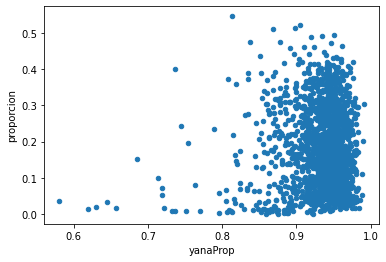

In [261]:
CongreYanay.plot.scatter(x='yanaProp',y='proporcion',)

In [255]:
CongreYanay.to_csv('CongreYanay.csv',index=False)

In [276]:
Presis=pd.read_excel("1ra_vuelta_Version_PCM.xlsx")
Presis.columns

Index(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TIPO_ELECCION',
       'MESA_DE_VOTACION', 'DESCRIP_ESTADO_ACTA', 'TIPO_OBSERVACION', 'N_CVAS',
       'N_ELEC_HABIL', 'VOTOS_P1', 'VOTOS_P2', 'VOTOS_P3', 'VOTOS_P4',
       'VOTOS_P5', 'VOTOS_P6', 'VOTOS_P7', 'VOTOS_P8', 'VOTOS_P9', 'VOTOS_P10',
       'VOTOS_P11', 'VOTOS_P12', 'VOTOS_P13', 'VOTOS_P14', 'VOTOS_P15',
       'VOTOS_P16', 'VOTOS_P17', 'VOTOS_P18', 'VOTOS_VB', 'VOTOS_VN',
       'VOTOS_VI'],
      dtype='object')

In [277]:
Presis['presiEmitidos']=Presis.iloc[:,10:].sum(axis=1)

In [278]:
Presis[Presis.N_CVAS!=Presis.presiEmitidos]

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ELECCION,MESA_DE_VOTACION,DESCRIP_ESTADO_ACTA,TIPO_OBSERVACION,N_CVAS,N_ELEC_HABIL,...,VOTOS_P13,VOTOS_P14,VOTOS_P15,VOTOS_P16,VOTOS_P17,VOTOS_P18,VOTOS_VB,VOTOS_VN,VOTOS_VI,presiEmitidos
19,921001,AMERICA,CHILE,ANTOFAGASTA,PRESIDENCIAL,80614,SIN INSTALAR,NaN,NaN,296,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
24,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80970,SIN INSTALAR,NaN,NaN,299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
25,921005,AMERICA,CHILE,IQUIQUE,PRESIDENCIAL,80660,SIN INSTALAR,NaN,NaN,297,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
26,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80720,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
27,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80731,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85210,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80870,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85211,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80956,SIN INSTALAR,NaN,NaN,299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85212,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80879,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
85213,921006,AMERICA,CHILE,SANTIAGO,PRESIDENCIAL,80889,SIN INSTALAR,NaN,NaN,300,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [279]:
Presis.DESCRIP_ESTADO_ACTA.value_counts()

CONTABILIZADA             81924
COMPUTADA RESUELTA         3081
ANULADA                     949
SIN INSTALAR                499
EN PROCESO                   32
ANULADA POR EXTRAVIADA        3
Name: DESCRIP_ESTADO_ACTA, dtype: int64

In [280]:
Presis=Presis[Presis.DESCRIP_ESTADO_ACTA.isin(['CONTABILIZADA','COMPUTADA RESUELTA','ACTA RESUELTA'])]

In [281]:
Presis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ELECCION,MESA_DE_VOTACION,DESCRIP_ESTADO_ACTA,TIPO_OBSERVACION,N_CVAS,N_ELEC_HABIL,...,VOTOS_P13,VOTOS_P14,VOTOS_P15,VOTOS_P16,VOTOS_P17,VOTOS_P18,VOTOS_VB,VOTOS_VN,VOTOS_VI,presiEmitidos
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,31,CONTABILIZADA,NaN,97.0,300,...,3.0,NaN,1.0,4.0,NaN,3.0,NaN,20.0,NaN,97.0
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,54,CONTABILIZADA,NaN,204.0,300,...,21.0,1.0,2.0,22.0,NaN,30.0,19.0,15.0,NaN,204.0
2,10204,AMAZONAS,BAGUA,EL PARCO,PRESIDENCIAL,205,CONTABILIZADA,NaN,224.0,300,...,7.0,3.0,1.0,54.0,NaN,15.0,37.0,14.0,NaN,224.0
3,10512,AMAZONAS,RODRIGUEZ DE MENDOZA,VISTA ALEGRE,PRESIDENCIAL,576,CONTABILIZADA,NaN,81.0,247,...,5.0,1.0,1.0,15.0,NaN,NaN,28.0,2.0,NaN,81.0
4,10601,AMAZONAS,CONDORCANQUI,NIEVA,PRESIDENCIAL,585,CONTABILIZADA,NaN,159.0,300,...,4.0,NaN,NaN,28.0,NaN,2.0,27.0,8.0,NaN,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86483,210609,SAN MARTIN,SAN MARTIN,HUIMBAYOC,PRESIDENCIAL,903012,CONTABILIZADA,NaN,158.0,188,...,1.0,1.0,1.0,NaN,NaN,3.0,52.0,12.0,NaN,158.0
86484,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,PRESIDENCIAL,79806,CONTABILIZADA,NaN,175.0,238,...,6.0,1.0,2.0,39.0,NaN,11.0,55.0,5.0,NaN,175.0
86485,250301,UCAYALI,ATALAYA,RAIMONDI,PRESIDENCIAL,79850,CONTABILIZADA,NaN,193.0,300,...,1.0,NaN,NaN,13.0,1.0,3.0,72.0,12.0,NaN,193.0
86486,250302,UCAYALI,ATALAYA,TAHUANIA,PRESIDENCIAL,79907,CONTABILIZADA,NaN,146.0,300,...,1.0,1.0,5.0,20.0,NaN,3.0,37.0,11.0,NaN,146.0


In [282]:
presiDis=Presis[Presis.DEPARTAMENTO.isin(yanapayDis.DEPARTAMENTO)]
presiDis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ELECCION,MESA_DE_VOTACION,DESCRIP_ESTADO_ACTA,TIPO_OBSERVACION,N_CVAS,N_ELEC_HABIL,...,VOTOS_P13,VOTOS_P14,VOTOS_P15,VOTOS_P16,VOTOS_P17,VOTOS_P18,VOTOS_VB,VOTOS_VN,VOTOS_VI,presiEmitidos
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,31,CONTABILIZADA,NaN,97.0,300,...,3.0,NaN,1.0,4.0,NaN,3.0,NaN,20.0,NaN,97.0
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,PRESIDENCIAL,54,CONTABILIZADA,NaN,204.0,300,...,21.0,1.0,2.0,22.0,NaN,30.0,19.0,15.0,NaN,204.0
2,10204,AMAZONAS,BAGUA,EL PARCO,PRESIDENCIAL,205,CONTABILIZADA,NaN,224.0,300,...,7.0,3.0,1.0,54.0,NaN,15.0,37.0,14.0,NaN,224.0
3,10512,AMAZONAS,RODRIGUEZ DE MENDOZA,VISTA ALEGRE,PRESIDENCIAL,576,CONTABILIZADA,NaN,81.0,247,...,5.0,1.0,1.0,15.0,NaN,NaN,28.0,2.0,NaN,81.0
4,10601,AMAZONAS,CONDORCANQUI,NIEVA,PRESIDENCIAL,585,CONTABILIZADA,NaN,159.0,300,...,4.0,NaN,NaN,28.0,NaN,2.0,27.0,8.0,NaN,159.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86483,210609,SAN MARTIN,SAN MARTIN,HUIMBAYOC,PRESIDENCIAL,903012,CONTABILIZADA,NaN,158.0,188,...,1.0,1.0,1.0,NaN,NaN,3.0,52.0,12.0,NaN,158.0
86484,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,PRESIDENCIAL,79806,CONTABILIZADA,NaN,175.0,238,...,6.0,1.0,2.0,39.0,NaN,11.0,55.0,5.0,NaN,175.0
86485,250301,UCAYALI,ATALAYA,RAIMONDI,PRESIDENCIAL,79850,CONTABILIZADA,NaN,193.0,300,...,1.0,NaN,NaN,13.0,1.0,3.0,72.0,12.0,NaN,193.0
86486,250302,UCAYALI,ATALAYA,TAHUANIA,PRESIDENCIAL,79907,CONTABILIZADA,NaN,146.0,300,...,1.0,1.0,5.0,20.0,NaN,3.0,37.0,11.0,NaN,146.0


In [283]:
presiDis.columns

Index(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TIPO_ELECCION',
       'MESA_DE_VOTACION', 'DESCRIP_ESTADO_ACTA', 'TIPO_OBSERVACION', 'N_CVAS',
       'N_ELEC_HABIL', 'VOTOS_P1', 'VOTOS_P2', 'VOTOS_P3', 'VOTOS_P4',
       'VOTOS_P5', 'VOTOS_P6', 'VOTOS_P7', 'VOTOS_P8', 'VOTOS_P9', 'VOTOS_P10',
       'VOTOS_P11', 'VOTOS_P12', 'VOTOS_P13', 'VOTOS_P14', 'VOTOS_P15',
       'VOTOS_P16', 'VOTOS_P17', 'VOTOS_P18', 'VOTOS_VB', 'VOTOS_VN',
       'VOTOS_VI', 'presiEmitidos'],
      dtype='object')

In [286]:
selectPresi=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'VOTOS_P16', 'presiEmitidos']
presiDis=presiDis.loc[:,selectPresi]
presiDis

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,VOTOS_P16,presiEmitidos
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,4.0,97.0
1,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,22.0,204.0
2,10204,AMAZONAS,BAGUA,EL PARCO,54.0,224.0
3,10512,AMAZONAS,RODRIGUEZ DE MENDOZA,VISTA ALEGRE,15.0,81.0
4,10601,AMAZONAS,CONDORCANQUI,NIEVA,28.0,159.0
...,...,...,...,...,...,...
86483,210609,SAN MARTIN,SAN MARTIN,HUIMBAYOC,NaN,158.0
86484,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,39.0,175.0
86485,250301,UCAYALI,ATALAYA,RAIMONDI,13.0,193.0
86486,250302,UCAYALI,ATALAYA,TAHUANIA,20.0,146.0


In [292]:
unidades=['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']
presiDisPeruLibre=presiDis.groupby(unidades).agg({'presiEmitidos':'sum','VOTOS_P16':'sum'})

In [297]:
presiDisPeruLibre.reset_index(inplace=True)
presiDisPeruLibre

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,presiEmitidos,VOTOS_P16
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,324.0,41.0
...,...,...,...,...,...,...
1869,250301,UCAYALI,ATALAYA,RAIMONDI,13165.0,1354.0
1870,250302,UCAYALI,ATALAYA,TAHUANIA,2967.0,300.0
1871,250303,UCAYALI,ATALAYA,YURUA,393.0,10.0
1872,250304,UCAYALI,ATALAYA,SEPAHUA,2657.0,162.0


In [310]:
CongrePresiYanay=CongreYanay.merge(presiDisPeruLibre,on=theKeys)
CongrePresiYanay

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,UBIGEO_y,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion,yanaProp,UBIGEO,presiEmitidos,VOTOS_P16
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,10101,718.0,13427.0,0.053474,0.958123,10101,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,10102,5.0,114.0,0.043860,0.972376,10102,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,10103,97.0,504.0,0.192460,0.931604,10103,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,10104,19.0,411.0,0.046229,0.970297,10104,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,10105,18.0,324.0,0.055556,0.947368,10105,324.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,250202,1149.0,6535.0,0.175822,0.865626,250202,6333.0,1659.0
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,250203,896.0,4142.0,0.216321,0.889581,250203,4738.0,1223.0
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,250204,526.0,3854.0,0.136482,0.919645,250204,3658.0,624.0
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,250205,457.0,2670.0,0.171161,0.888398,250205,2670.0,595.0


In [305]:
set(presiDisPeruLibre.PROVINCIA) - set(CongreYanay.PROVINCIA)

set()

In [307]:
presiDisPeruLibre.PROVINCIA=presiDisPeruLibre.PROVINCIA.str.replace('øø','Ñ')
presiDisPeruLibre.DISTRITO=presiDisPeruLibre.DISTRITO.str.replace('øø','Ñ')

In [308]:
set(presiDisPeruLibre.DISTRITO) - set(CongreYanay.DISTRITO)

set()

In [319]:
CongrePresiYanay.columns#.to_csv("CongrePresiYanay.csv",index)

Index(['UBIGEO_x', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'PROGRAMADO',
       'EJECUTADO', 'PARTIDO POLITICO NACIONAL PERU LIBRE', 'TotalEmitido',
       'proporcion', 'yanaProp', 'UBIGEO', 'presiEmitidos', 'VOTOS_P16'],
      dtype='object')

In [318]:
CongrePresiYanay[CongrePresiYanay.UBIGEO_y!=CongrePresiYanay.UBIGEO]
CongrePresiYanay.drop(columns='UBIGEO_y',inplace=True)
CongrePresiYanay

,UBIGEO_x,DEPARTAMENTO,PROVINCIA,DISTRITO,PROGRAMADO,EJECUTADO,PARTIDO POLITICO NACIONAL PERU LIBRE,TotalEmitido,proporcion,yanaProp,UBIGEO,presiEmitidos,VOTOS_P16
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,718.0,13427.0,0.053474,0.958123,10101,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,5.0,114.0,0.043860,0.972376,10102,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,97.0,504.0,0.192460,0.931604,10103,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,19.0,411.0,0.046229,0.970297,10104,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,18.0,324.0,0.055556,0.947368,10105,324.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,1149.0,6535.0,0.175822,0.865626,250202,6333.0,1659.0
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,896.0,4142.0,0.216321,0.889581,250203,4738.0,1223.0
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,526.0,3854.0,0.136482,0.919645,250204,3658.0,624.0
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,457.0,2670.0,0.171161,0.888398,250205,2670.0,595.0


In [325]:
olds=['UBIGEO_x','PROGRAMADO','EJECUTADO','PARTIDO POLITICO NACIONAL PERU LIBRE','TotalEmitido','proporcion','VOTOS_P16']
news=['UBIGEO_yana','programado_yana','ejecutado_yana','PeruLibre_congre',"congreEmitidos","proporcion_congre",'PeruLibre_presi']
mapChanges={old:new for old,new in zip(olds,news)}
CongrePresiYanay.rename(columns=mapChanges,inplace=True)
CongrePresiYanay

,UBIGEO_yana,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,PeruLibre_congre,congreEmitidos,proporcion_congre,yanaProp,UBIGEO,presiEmitidos,PeruLibre_presi
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,718.0,13427.0,0.053474,0.958123,10101,13619.0,1695.0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,5.0,114.0,0.043860,0.972376,10102,114.0,14.0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,97.0,504.0,0.192460,0.931604,10103,504.0,117.0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,19.0,411.0,0.046229,0.970297,10104,411.0,44.0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,18.0,324.0,0.055556,0.947368,10105,324.0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,1149.0,6535.0,0.175822,0.865626,250202,6333.0,1659.0
1870,250303,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,896.0,4142.0,0.216321,0.889581,250203,4738.0,1223.0
1871,250304,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,526.0,3854.0,0.136482,0.919645,250204,3658.0,624.0
1872,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,457.0,2670.0,0.171161,0.888398,250205,2670.0,595.0


In [330]:
orderCols=['UBIGEO_yana', 'UBIGEO','DEPARTAMENTO', 'PROVINCIA', 'DISTRITO',
       'programado_yana', 'ejecutado_yana','yanaProp', 'PeruLibre_congre',
       'congreEmitidos', 'proporcion_congre', 'PeruLibre_presi','presiEmitidos']
CongrePresiYanay=CongrePresiYanay.loc[:,orderCols]
CongrePresiYanay

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,0.053474,1695.0,13619.0
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,0.043860,14.0,114.0
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,0.192460,117.0,504.0
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,0.046229,44.0,411.0
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,0.055556,41.0,324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,0.175822,1659.0,6333.0
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,0.216321,1223.0,4738.0
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,0.136482,624.0,3658.0
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,0.171161,595.0,2670.0


In [332]:
CongrePresiYanay['proporcion_presi']=CongrePresiYanay.PeruLibre_presi/CongrePresiYanay.presiEmitidos
CongrePresiYanay

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos,proporcion_presi
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,0.053474,1695.0,13619.0,0.124458
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,0.043860,14.0,114.0,0.122807
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,0.192460,117.0,504.0,0.232143
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,0.046229,44.0,411.0,0.107056
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,0.055556,41.0,324.0,0.126543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,0.175822,1659.0,6333.0,0.261961
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,0.216321,1223.0,4738.0,0.258126
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,0.136482,624.0,3658.0,0.170585
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,0.171161,595.0,2670.0,0.222846


In [333]:
CongrePresiYanay.to_csv('CongrePresiYanay.csv',index=False)

In [336]:
b600=pd.read_excel("BONO 600 - DISTRITAL.xlsx",4)

In [339]:
b600.describe()

,IDBONO,UBIGEO,IDTIPO_ABONO,HOGARES_PROG,HOGARES_EJEC
count,18910.000000,18910.000000,18910.000000,18910.000000,18910.000000
mean,7.500000,106808.704918,2.000000,249.734532,234.035378
std,0.500013,67142.095551,1.414251,2456.476298,2395.717735
min,7.000000,10101.000000,0.000000,0.000000,0.000000
25%,7.000000,50403.000000,1.000000,0.000000,0.000000
50%,7.500000,100316.000000,2.000000,0.000000,0.000000
75%,8.000000,150806.000000,3.000000,0.000000,0.000000
max,8.000000,250401.000000,4.000000,153702.000000,153702.000000


In [366]:
b600Sum=b600.groupby(['UBIGEO', 'DEPARTAMENTO', 'PROVINCIA','DISTRITO']).agg({'HOGARES_PROG': 'sum','HOGARES_EJEC':'sum'})
b600Sum.reset_index(inplace=True)


In [367]:
onlyb600=list(set(b600Sum.DISTRITO) - set(CongreYanay.DISTRITO))
onlyYana=list(set(CongreYanay.DISTRITO) - set(b600Sum.DISTRITO))

In [368]:
onlyb600

['MILPUC',
 'LAMBRAS',
 'MAZAMARI/PANGOA',
 'UNION ASHANINKA',
 'HUAYLLAY GRANDE',
 'RIO MAGDALENA',
 'SANTA CRUZ DE TOLEDO',
 'BOQUERON',
 'CASPISAPA',
 'GAMARRA',
 'PATIBAMBA',
 'KUMPIRUSHIATO',
 'TOMAY KICHWA',
 'CAPAZO',
 'CARMEN DE LA LEGUA REYNOSO',
 'RAYMONDI',
 'HUIPOCA',
 'MANITEA',
 'SAN JUAN DE ISCOS',
 'SANTA RITA DE SIGUAS',
 'UNION PROGRESO',
 'ESTIQUE-PAMPA',
 'CIELO PUNCO',
 'AHUAYRO',
 'HUAYA',
 'QUISQUI (KICHKI)',
 'RINCONADA LLICUAR',
 'PUTIS']

In [380]:
from thefuzz import process

changesb600={dis: process.extractOne(dis, onlyYana)[0] for dis in sorted(onlyb600) if process.extractOne(dis, onlyYana)[1]>70}
changesb600#, len(changesb600)

{'CAPAZO': 'CAPASO',
 'CARMEN DE LA LEGUA REYNOSO': 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPISAPA': 'CASPIZAPA',
 'ESTIQUE-PAMPA': 'ESTIQUE PAMPA',
 'GAMARRA': 'MARISCAL GAMARRA',
 'HUAYA': 'HUALLA',
 'HUAYLLAY GRANDE': 'HUALLAY-GRANDE',
 'MILPUC': 'MILPUCC',
 'QUISQUI (KICHKI)': 'QUISQUI',
 'RAYMONDI': 'RAIMONDI',
 'RINCONADA LLICUAR': 'RINCONADA-LLICUAR',
 'SAN JUAN DE ISCOS': 'SAN JUAN DE YSCOS',
 'SANTA CRUZ DE TOLEDO': 'SANTA CRUZ DE TOLED',
 'SANTA RITA DE SIGUAS': 'SANTA RITA DE SIHUAS',
 'TOMAY KICHWA': 'TOMAY-KICHWA'}

In [384]:
b600Sum.DISTRITO.replace(changesb600,inplace=True)
b600Sum

,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,HOGARES_PROG,HOGARES_EJEC
0,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,0,0
1,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,0,0
2,10103,AMAZONAS,CHACHAPOYAS,BALSAS,0,0
3,10104,AMAZONAS,CHACHAPOYAS,CHETO,0,0
4,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,0,0
...,...,...,...,...,...,...
1886,250304,UCAYALI,PADRE ABAD,NESHUYA,0,0
1887,250305,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,0,0
1888,250306,UCAYALI,PADRE ABAD,HUIPOCA,0,0
1889,250307,UCAYALI,PADRE ABAD,BOQUERON,0,0


In [385]:
onlyb600=list(set(b600Sum.DISTRITO) - set(CongreYanay.DISTRITO))
onlyYana=list(set(CongreYanay.DISTRITO) - set(b600Sum.DISTRITO))

In [389]:
onlyb600

['HUIPOCA',
 'LAMBRAS',
 'MAZAMARI/PANGOA',
 'MANITEA',
 'UNION ASHANINKA',
 'PATIBAMBA',
 'UNION PROGRESO',
 'KUMPIRUSHIATO',
 'CIELO PUNCO',
 'RIO MAGDALENA',
 'AHUAYRO',
 'BOQUERON',
 'PUTIS']

In [391]:
onlyb600P=list(set(b600Sum.PROVINCIA) - set(CongreYanay.PROVINCIA))
onlyYanaP=list(set(CongreYanay.PROVINCIA) - set(b600Sum.PROVINCIA))

In [393]:
onlyb600P

['ANTONIO RAYMONDI']

In [394]:
b600Sum['PROVINCIA']=b600Sum.PROVINCIA.str.replace(pat='ANTONIO RAYMONDI',repl='ANTONIO RAIMONDI',regex=False)

In [405]:
CongrePresiYanay

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos,proporcion_presi
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,0.053474,1695.0,13619.0,0.124458
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,0.043860,14.0,114.0,0.122807
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,0.192460,117.0,504.0,0.232143
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,0.046229,44.0,411.0,0.107056
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,0.055556,41.0,324.0,0.126543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,0.175822,1659.0,6333.0,0.261961
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,0.216321,1223.0,4738.0,0.258126
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,0.136482,624.0,3658.0,0.170585
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,0.171161,595.0,2670.0,0.222846


In [406]:
theKeys=['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']
b600Sum.drop(columns=["UBIGEO"],inplace=True)
CongrePresiYanay600=CongrePresiYanay.merge(b600Sum,on=theKeys)
mapren={'HOGARES_PROG':'programado_b600','HOGARES_EJEC':'ejecutado_b600'}
CongrePresiYanay600.rename(columns=mapren,inplace=True)
CongrePresiYanay600

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos,proporcion_presi,programado_b600,ejecutado_b600
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,0.053474,1695.0,13619.0,0.124458,0,0
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,0.043860,14.0,114.0,0.122807,0,0
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,0.192460,117.0,504.0,0.232143,0,0
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,0.046229,44.0,411.0,0.107056,0,0
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,0.055556,41.0,324.0,0.126543,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,0.175822,1659.0,6333.0,0.261961,0,0
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,0.216321,1223.0,4738.0,0.258126,0,0
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,0.136482,624.0,3658.0,0.170585,0,0
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,0.171161,595.0,2670.0,0.222846,0,0


In [407]:
CongrePresiYanay600.to_csv("CongrePresiYanay600.csv",index=False)

In [454]:
ceplan=pd.read_excel("Datos-para-el-planeamiento-estrategico.xlsx",3,skiprows=8)
ceplan.head(20)

,Unnamed: 0,Ubigeo,Región /\nProvincia /\nDistrito,Población total\n(2007)\n1a/,Población total\n(2017)\n1a/,Población total\n(2020)\n1b/,Población de niños menores de un año\n(CENSO 2017)\n1a/,Población mayor de 80 años \n(2020)\n1b/,Población con Discapacidad\n(2020)\n1c/,Superficie (km2) \n2/,...,Índice de Desarrollo Humano -IDH\n(2019)\n15/,Porcentaje de la población en pobreza total\n16a/,Pobreza total: Número de habitantes en situación de pobreza\n\n16b/,Porcentaje de la población en pobreza extrema \n17a/,Pobreza extrema: Número de habitantes en situación de pobreza extrema \n17b/,Población Ocupada\n(2007) \n18/,Población Ocupada\n(2017 )\n18/,Devengado per cápita en soles (2020) - Actividad\n19/,Devengado per cápita en soles (2020) - Inversión\n19/,Devengado per cápita en soles (2020) - Total\n19/
0,Nacional,NACIONAL,NaN,28481901,31237385.0,34393444.0,493495.0,628342.0,297030,1280172.28,...,0.585764,30.100000,1.035243e+07,5.100000,1.754066e+06,10251272,1.314957e+07,4520.201693,770.969110,5291.170803
1,Nacional_esp,NACIONAL SIN LA PROV. DE LIMA,NaN,20620156,22075063.0,24188630.0,371675.0,434258.0,217586,1277557.12,...,-,31.724256,7.673663e+06,5.964864,1.442819e+06,6964502,8.705205e+06,3330.091783,897.070679,4227.162462
2,Región,150000,LIMA,8730820,10135009.0,11261067.0,137218.0,217672.0,88625,34823.52,...,0.707336,26.250000,2.956030e+06,3.050000,3.434625e+05,3625326,4.873073e+06,6923.735936,488.735054,7412.470989
3,Zona,ZONA NORTE,NaN,8367388,8987709.0,9962022.0,162076.0,171114.0,84289,572940.33,...,-,31.834415,3.171351e+06,5.864900,5.842626e+05,2690762,3.324782e+06,2947.760521,821.040898,3768.801420
4,Región,010000,AMAZONAS,406087,417365.0,472993.0,8043.0,7743.0,7826,39249.13,...,0.417736,32.950000,1.558512e+05,7.300000,3.452849e+04,124320,1.427014e+05,3919.830013,1561.378837,5481.208850
5,Provincia,010200,BAGUA,77637,82193.0,98110.0,1636.0,1217.0,1586,5652.72,...,0.461036,34.843027,3.418449e+04,23.068140,2.263215e+04,24239,2.688646e+04,4747.486136,1050.076689,5797.562825
6,Distrito,010202,ARAMANGO,12449,10487.0,12396.0,196.0,192.0,191,809.07,...,0.361182,38.525807,4.775659e+03,19.270750,2.388802e+03,4019,3.569083e+03,273.789848,372.794589,646.584438
7,Distrito,010201,BAGUA,25984,28836.0,27423.0,442.0,327.0,513,150.99,...,0.584063,16.212835,4.446046e+03,4.467983,1.225255e+03,(**),1.191331e+04,3978.526911,1089.854262,5068.381173
8,Distrito,010203,COPALLÍN,6736,4972.0,5694.0,69.0,117.0,129,99.05,...,0.467245,24.530258,1.396753e+03,11.243630,6.402123e+02,2307,1.700876e+03,447.754064,4689.310687,5137.064751
9,Distrito,010204,EL PARCO,1376,1293.0,1719.0,18.0,39.0,19,18.48,...,0.489049,35.249588,6.059404e+02,12.159050,2.090141e+02,417,3.702573e+02,509.347243,1474.730733,1984.077976


In [455]:
ceplan.columns 

Index(['Unnamed: 0', 'Ubigeo', 'Región /\nProvincia /\nDistrito',
       'Población total\n(2007)\n1a/', 'Población total\n(2017)\n1a/',
       'Población total\n(2020)\n1b/',
       'Población de niños menores de un año\n(CENSO 2017)\n1a/',
       'Población mayor de 80 años \n(2020)\n1b/',
       'Población con Discapacidad\n(2020)\n1c/', 'Superficie (km2) \n2/',
       'Densidad\n(2020)', 'Capital legal \n3/', 'Altitud (msnm)\n 3/',
       'Latitud\nsur\n 3/', 'Longitud oeste\n 3/',
       'Tipología de distrito según SDOT\n4/',
       'Centro  Fucional de Organización Territorial\n4a/',
       'Número de Provincias 3/', 'Número  de Distritos \n3/',
       'Número de Centros Poblados\n3/', 'País fronterizo',
       'Población de niños menores de un año\n(CENSO 2017)\n1a/.1',
       'Número anual de nacidos vivos según distrito de residencia habitual de la madre (2020)\n5/',
       'Número anual de nacidos vivos con bajo peso según distrito de residencia habitual de la madre (2020)\n

In [456]:
selectceplan=['Unnamed: 0', 'Ubigeo', 'Región /\nProvincia /\nDistrito','Población total\n(2020)\n1b/',
       'Población con Discapacidad\n(2020)\n1c/', 'Superficie (km2) \n2/',
       'Densidad\n(2020)', 'Altitud (msnm)\n 3/',
       'Latitud\nsur\n 3/', 'Longitud oeste\n 3/','Número de Centros Poblados\n3/',
 'Porcentaje de desnutrición crónica\n (Niños menores de 5 años) \n(2020)\n9/',
 'Porcentaje de la población en pobreza extrema \n17a/']
ceplan=ceplan[selectceplan]
ceplan

,Unnamed: 0,Ubigeo,Región /\nProvincia /\nDistrito,Población total\n(2020)\n1b/,Población con Discapacidad\n(2020)\n1c/,Superficie (km2) \n2/,Densidad\n(2020),Altitud (msnm)\n 3/,Latitud\nsur\n 3/,Longitud oeste\n 3/,Número de Centros Poblados\n3/,Porcentaje de desnutrición crónica\n (Niños menores de 5 años) \n(2020)\n9/,Porcentaje de la población en pobreza extrema \n17a/
0,Nacional,NACIONAL,NaN,34393444.0,297030,1280172.28,26.866262,NaN,NaN,NaN,94922.0,12.067981,5.100000
1,Nacional_esp,NACIONAL SIN LA PROV. DE LIMA,NaN,24188630.0,217586,1277557.12,18.933502,NaN,NaN,NaN,94811.0,14.864528,5.964864
2,Región,150000,LIMA,11261067.0,88625,34823.52,323.375322,162.42,-12.045278,-77.030833,5229.0,5.085055,3.050000
3,Zona,ZONA NORTE,NaN,9962022.0,84289,572940.33,17.387538,NaN,NaN,NaN,22540.0,15.73736,5.864900
4,Región,010000,AMAZONAS,472993.0,7826,39249.13,12.051044,2338.00,-6.229444,-77.872778,3174.0,17.467389,7.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2126,NaN,NaN,ZONA SUR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2127,NaN,NaN,DEPARTAMENTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2128,NaN,NaN,PROVINCIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
ceplan.columns=['nivel', 'ubigeo', 'lugar','pobTotal','pobDiscapacidad', 
 'superficie','densidad', 'altitud','latitud', 'longitud',
 'numeroCentrosPoblados', 'porcentajeDesnutCrónica5menos',
 'porcentajePobrezaExtrema']
ceplan=ceplan.iloc[:2102,:]
ceplan

,nivel,ubigeo,lugar,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema
0,Nacional,NACIONAL,NaN,34393444.0,297030,1280172.28,26.866262,NaN,NaN,NaN,94922.0,12.067981,5.100000
1,Nacional_esp,NACIONAL SIN LA PROV. DE LIMA,NaN,24188630.0,217586,1277557.12,18.933502,NaN,NaN,NaN,94811.0,14.864528,5.964864
2,Región,150000,LIMA,11261067.0,88625,34823.52,323.375322,162.42,-12.045278,-77.030833,5229.0,5.085055,3.050000
3,Zona,ZONA NORTE,NaN,9962022.0,84289,572940.33,17.387538,NaN,NaN,NaN,22540.0,15.73736,5.864900
4,Región,010000,AMAZONAS,472993.0,7826,39249.13,12.051044,2338.00,-6.229444,-77.872778,3174.0,17.467389,7.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097,Distrito,230405,SITAJARA,381.0,1,251.24,1.516478,3163.00,-17.375278,-70.133889,6.0,S.I.,17.484620
2098,Distrito,230406,SUSAPAYA,675.0,4,373.21,1.808633,3462.00,-17.348056,-70.133611,71.0,18.181818,24.525570
2099,Distrito,230401,TARATA,3427.0,37,864.31,3.965013,3077.00,-17.475000,-70.031944,137.0,8.152174,18.314420
2100,Distrito,230407,TARUCACHI,656.0,1,113.27,5.791472,3054.00,-17.525833,-70.031667,13.0,10,5.747654


In [539]:
ceplanDis[ceplanDis.lugar.str.contains('PEDRO',regex=False)]

,nivel,ubigeo,lugar,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema
182,Distrito,061001,PEDRO GALVEZ,20794.0,306,238.74,87.098936,2280.0,-7.335833,-78.170000,58.0,23.85399,16.803380
250,Distrito,130701,SAN PEDRO DE LLOC,19320.0,97,697.01,27.718397,49.0,-7.418333,-79.514722,21.0,8.791209,1.597771
619,Distrito,021015,SAN PEDRO DE CHANA,4380.0,44,138.65,31.590335,3439.0,-9.403056,-77.011111,26.0,35.348837,7.387852
652,Distrito,021409,SAN PEDRO,884.0,1,531.21,1.664125,2243.0,-10.371944,-77.487222,47.0,16.666667,5.867743
754,Distrito,100108,SAN PEDRO DE CHAULAN,4732.0,10,266.36,17.76543,3587.0,-10.056389,-76.485556,151.0,33.802817,35.388700
883,Distrito,120429,SAN PEDRO DE CHUNAN,789.0,19,8.44,93.483412,3417.0,-11.725556,-75.486389,3.0,0,6.790990
908,Distrito,120708,SAN PEDRO DE CAJAS,4187.0,59,537.31,7.792522,4027.0,-11.249167,-75.862778,42.0,26.190476,14.231200
1032,Distrito,150724,SAN PEDRO DE CASTA,1198.0,S.I.,79.91,14.991866,3196.0,-11.758889,-76.596389,9.0,11.764706,2.899056
1033,Distrito,150725,SAN PEDRO DE HUANCAYRE,271.0,S.I.,41.75,6.491018,3140.0,-12.131389,-76.215556,29.0,37.5,5.103080
1084,Distrito,151027,SAN PEDRO DE PILAS,401.0,2,97.39,4.117466,2678.0,-12.454444,-76.226944,22.0,23.529412,6.225178


In [540]:

ceplanDis=ceplan[ceplan.nivel=='Distrito']
ceplanDis.reset_index(drop=True,inplace=True)
ceplanDis.lugar=ceplanDis.lugar.str.replace("Á",'A',regex=False)
ceplanDis.lugar=ceplanDis.lugar.str.replace("É",'E',regex=False)
ceplanDis.lugar=ceplanDis.lugar.str.replace("Í",'I',regex=False)
ceplanDis.lugar=ceplanDis.lugar.str.replace("Ó",'O',regex=False)
ceplanDis.lugar=ceplanDis.lugar.str.replace("Ú",'U',regex=False)
ceplanDis

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/118694697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceplanDis.lugar=ceplanDis.lugar.str.replace("Á",'A',regex=False)
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/118694697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceplanDis.lugar=ceplanDis.lugar.str.replace("É",'E',regex=False)
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/118694697.py:5: SettingWithCopyWarning: 
A value is trying to be s

,nivel,ubigeo,lugar,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema
0,Distrito,010202,ARAMANGO,12396.0,191,809.07,15.321295,502.0,-5.416389,-78.437778,87.0,22.65343,19.270750
1,Distrito,010201,BAGUA,27423.0,513,150.99,181.621299,408.0,-5.638889,-78.531111,24.0,10.413031,4.467983
2,Distrito,010203,COPALLIN,5694.0,129,99.05,57.486118,693.0,-5.675000,-78.423056,31.0,12.394366,11.243630
3,Distrito,010204,EL PARCO,1719.0,19,18.48,93.019481,626.0,-5.625000,-78.475278,9.0,15.463918,12.159050
4,Distrito,010205,IMAZA,40964.0,358,4430.84,9.2452,317.0,-5.163611,-78.288889,159.0,36.580938,48.888840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Distrito,230405,SITAJARA,381.0,1,251.24,1.516478,3163.0,-17.375278,-70.133889,6.0,S.I.,17.484620
1870,Distrito,230406,SUSAPAYA,675.0,4,373.21,1.808633,3462.0,-17.348056,-70.133611,71.0,18.181818,24.525570
1871,Distrito,230401,TARATA,3427.0,37,864.31,3.965013,3077.0,-17.475000,-70.031944,137.0,8.152174,18.314420
1872,Distrito,230407,TARUCACHI,656.0,1,113.27,5.791472,3054.0,-17.525833,-70.031667,13.0,10,5.747654


In [541]:
InCeplan=set(ceplanDis.lugar)-set(CongrePresiYanay600.DISTRITO)
InYanay=set(CongrePresiYanay600.DISTRITO)-set(ceplanDis.lugar)

In [543]:
changesCeplan={dis: process.extractOne(dis, InYanay)[0] for dis in sorted(InCeplan)}# if process.extractOne(dis, InCeplan)[1]>70}
changesCeplan#, len(changesb600)

{'CAPAZO': 'CAPASO',
 'CARMEN DE LA LEGUA REYNOSO': 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPISAPA': 'CASPIZAPA',
 'CRNEL.GREGORIO ALBARRACIN LANCHIPA': 'CORONEL GREGORIO ALBARRACIN LANCHIPA',
 'ESTIQUE-PAMPA': 'ESTIQUE PAMPA',
 'GAMARRA': 'MARISCAL GAMARRA',
 'HUAYA': 'HUALLA',
 'HUAYLLAY GRANDE': 'HUALLAY-GRANDE',
 'HUAYLLO': 'IHUAYLLO',
 'LA PECA a/': 'LA PECA',
 'MILPUC': 'MILPUCC',
 'RAYMONDI': 'RAIMONDI',
 'RINCONADA LLICUAR': 'RINCONADA-LLICUAR',
 'SAN JUAN DE ISCOS': 'SAN JUAN DE YSCOS',
 'SANTA BARBARA DE CARHUACAYA': 'SANTA BARBARA DE CARHUACAYAN',
 'SANTA CRUZ DE TOLEDO': 'SANTA CRUZ DE TOLED',
 'SANTA RITA DE SIGUAS': 'SANTA RITA DE SIHUAS',
 'TOMAY KICHWA': 'TOMAY-KICHWA'}

In [544]:
ceplanDis.lugar.replace(changesCeplan,inplace=True)
ceplanDis

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/1715716042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceplanDis.lugar.replace(changesCeplan,inplace=True)


,nivel,ubigeo,lugar,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema
0,Distrito,010202,ARAMANGO,12396.0,191,809.07,15.321295,502.0,-5.416389,-78.437778,87.0,22.65343,19.270750
1,Distrito,010201,BAGUA,27423.0,513,150.99,181.621299,408.0,-5.638889,-78.531111,24.0,10.413031,4.467983
2,Distrito,010203,COPALLIN,5694.0,129,99.05,57.486118,693.0,-5.675000,-78.423056,31.0,12.394366,11.243630
3,Distrito,010204,EL PARCO,1719.0,19,18.48,93.019481,626.0,-5.625000,-78.475278,9.0,15.463918,12.159050
4,Distrito,010205,IMAZA,40964.0,358,4430.84,9.2452,317.0,-5.163611,-78.288889,159.0,36.580938,48.888840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Distrito,230405,SITAJARA,381.0,1,251.24,1.516478,3163.0,-17.375278,-70.133889,6.0,S.I.,17.484620
1870,Distrito,230406,SUSAPAYA,675.0,4,373.21,1.808633,3462.0,-17.348056,-70.133611,71.0,18.181818,24.525570
1871,Distrito,230401,TARATA,3427.0,37,864.31,3.965013,3077.0,-17.475000,-70.031944,137.0,8.152174,18.314420
1872,Distrito,230407,TARUCACHI,656.0,1,113.27,5.791472,3054.0,-17.525833,-70.031667,13.0,10,5.747654


In [553]:
ceplanReg=ceplan[ceplan.nivel=='Región'][['ubigeo','lugar']]
ceplanReg.reset_index(drop=True,inplace=True)
ceplanReg.loc[:,'lugar']=ceplanReg.lugar.str.replace("Á",'A',regex=False)
ceplanReg.loc[:,'lugar']=ceplanReg.lugar.str.replace("É",'E',regex=False)
ceplanReg.loc[:,'lugar']=ceplanReg.lugar.str.replace("Í",'I',regex=False)
ceplanReg.loc[:,'lugar']=ceplanReg.lugar.str.replace("Ó",'O',regex=False)
ceplanReg.loc[:,'lugar']=ceplanReg.lugar.str.replace("Ú",'U',regex=False)
ceplanReg.columns=['ubireg','DEPARTAMENTO']
ceplanReg

,ubireg,DEPARTAMENTO
0,150000,LIMA
1,010000,AMAZONAS
2,060000,CAJAMARCA
3,130000,LA LIBERTAD
4,140000,LAMBAYEQUE
5,160000,LORETO
6,200000,PIURA
7,220000,SAN MARTIN
8,240000,TUMBES
9,020000,ANCASH


In [552]:
ceplanProv=ceplan[ceplan.nivel.str.contains('Prov')][['ubigeo','lugar']]
ceplanProv.reset_index(drop=True,inplace=True)
ceplanProv.loc[:,'lugar']=ceplanProv.lugar.str.replace("Á",'A',regex=False)
ceplanProv.loc[:,'lugar']=ceplanProv.lugar.str.replace("É",'E',regex=False)
ceplanProv.loc[:,'lugar']=ceplanProv.lugar.str.replace("Í",'I',regex=False)
ceplanProv.loc[:,'lugar']=ceplanProv.lugar.str.replace("Ó",'O',regex=False)
ceplanProv.loc[:,'lugar']=ceplanProv.lugar.str.replace("Ú",'U',regex=False)
ceplanProv.columns=['ubiprov','PROVINCIA']
ceplanProv

,ubiprov,PROVINCIA
0,010200,BAGUA
1,010300,BONGARA
2,010100,CHACHAPOYAS
3,010400,CONDORCANQUI
4,010500,LUYA
...,...,...
191,211300,YUNGUYO
192,230200,CANDARAVE
193,230300,JORGE BASADRE
194,230100,TACNA


In [554]:
ceplanDis['ubiprov']=[cod[:4]+'00' for cod in ceplanDis.ubigeo]
ceplanDis['ubireg']=[cod[:2]+'0000' for cod in ceplanDis.ubigeo]
ceplanDis

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/4013468122.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceplanDis['ubiprov']=[cod[:4]+'00' for cod in ceplanDis.ubigeo]
/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/4013468122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ceplanDis['ubireg']=[cod[:2]+'0000' for cod in ceplanDis.ubigeo]


,nivel,ubigeo,lugar,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema,ubireg,ubiprov
0,Distrito,010202,ARAMANGO,12396.0,191,809.07,15.321295,502.0,-5.416389,-78.437778,87.0,22.65343,19.270750,010000,010200
1,Distrito,010201,BAGUA,27423.0,513,150.99,181.621299,408.0,-5.638889,-78.531111,24.0,10.413031,4.467983,010000,010200
2,Distrito,010203,COPALLIN,5694.0,129,99.05,57.486118,693.0,-5.675000,-78.423056,31.0,12.394366,11.243630,010000,010200
3,Distrito,010204,EL PARCO,1719.0,19,18.48,93.019481,626.0,-5.625000,-78.475278,9.0,15.463918,12.159050,010000,010200
4,Distrito,010205,IMAZA,40964.0,358,4430.84,9.2452,317.0,-5.163611,-78.288889,159.0,36.580938,48.888840,010000,010200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Distrito,230405,SITAJARA,381.0,1,251.24,1.516478,3163.0,-17.375278,-70.133889,6.0,S.I.,17.484620,230000,230400
1870,Distrito,230406,SUSAPAYA,675.0,4,373.21,1.808633,3462.0,-17.348056,-70.133611,71.0,18.181818,24.525570,230000,230400
1871,Distrito,230401,TARATA,3427.0,37,864.31,3.965013,3077.0,-17.475000,-70.031944,137.0,8.152174,18.314420,230000,230400
1872,Distrito,230407,TARUCACHI,656.0,1,113.27,5.791472,3054.0,-17.525833,-70.031667,13.0,10,5.747654,230000,230400


In [555]:
ceplanDis=ceplanDis.merge(ceplanReg,on="ubireg")
ceplanDis=ceplanDis.merge(ceplanProv,on="ubiprov")
ceplanDis

,nivel,ubigeo,lugar,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema,ubireg,ubiprov,DEPARTAMENTO,PROVINCIA
0,Distrito,010202,ARAMANGO,12396.0,191,809.07,15.321295,502.0,-5.416389,-78.437778,87.0,22.65343,19.270750,010000,010200,AMAZONAS,BAGUA
1,Distrito,010201,BAGUA,27423.0,513,150.99,181.621299,408.0,-5.638889,-78.531111,24.0,10.413031,4.467983,010000,010200,AMAZONAS,BAGUA
2,Distrito,010203,COPALLIN,5694.0,129,99.05,57.486118,693.0,-5.675000,-78.423056,31.0,12.394366,11.243630,010000,010200,AMAZONAS,BAGUA
3,Distrito,010204,EL PARCO,1719.0,19,18.48,93.019481,626.0,-5.625000,-78.475278,9.0,15.463918,12.159050,010000,010200,AMAZONAS,BAGUA
4,Distrito,010205,IMAZA,40964.0,358,4430.84,9.2452,317.0,-5.163611,-78.288889,159.0,36.580938,48.888840,010000,010200,AMAZONAS,BAGUA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,Distrito,230405,SITAJARA,381.0,1,251.24,1.516478,3163.0,-17.375278,-70.133889,6.0,S.I.,17.484620,230000,230400,TACNA,TARATA
1870,Distrito,230406,SUSAPAYA,675.0,4,373.21,1.808633,3462.0,-17.348056,-70.133611,71.0,18.181818,24.525570,230000,230400,TACNA,TARATA
1871,Distrito,230401,TARATA,3427.0,37,864.31,3.965013,3077.0,-17.475000,-70.031944,137.0,8.152174,18.314420,230000,230400,TACNA,TARATA
1872,Distrito,230407,TARUCACHI,656.0,1,113.27,5.791472,3054.0,-17.525833,-70.031667,13.0,10,5.747654,230000,230400,TACNA,TARATA


In [563]:

ceplanDis.drop(columns=['ubiprov','ubireg'],inplace=True)
ceplanDis.head()

KeyError: "['ubiprov', 'ubireg'] not found in axis"

In [557]:
InCeplan=set(ceplanDis.PROVINCIA)-set(CongrePresiYanay600.PROVINCIA)
InYana=set(CongrePresiYanay600.PROVINCIA)-set(ceplanDis.PROVINCIA)

In [558]:
InCeplan

{'ANTONIO RAYMONDI', 'CARLOS F. FITZCARRALD', 'FAJARDO', 'PROVINCIA DE LIMA'}

In [559]:
changesCeplan2={prov: process.extractOne(prov, InYana)[0] for prov in sorted(InCeplan)}# if process.extractOne(dis, InCeplan)[1]>70}
changesCeplan2#, len(changesb600)

{'ANTONIO RAYMONDI': 'ANTONIO RAIMONDI',
 'CARLOS F. FITZCARRALD': 'CARLOS FERMIN FITZCARRALD',
 'FAJARDO': 'VICTOR FAJARDO',
 'PROVINCIA DE LIMA': 'LIMA'}

In [560]:
ceplanDis.PROVINCIA.replace(changesCeplan2,inplace=True)

In [564]:
newkeys={'lugar':'DISTRITO'}
ceplanDis.rename(columns=newkeys,inplace=True)


In [565]:
set(CongrePresiYanay600.DISTRITO)-set(ceplanDis.DISTRITO)

{'SAN PEDRO DE LARAOS'}

In [566]:
theKeys

['DEPARTAMENTO', 'PROVINCIA', 'DISTRITO']

In [570]:
test=CongrePresiYanay600.merge(ceplanDis,on=theKeys,how='outer',indicator=True)
test[test['_merge']!='both']

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,...,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema,_merge
1379,150712.0,140631.0,LIMA,HUAROCHIRI,SAN PEDRO DE LARAOS,207.0,189.0,0.913043,14.0,188.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1874,NaN,NaN,LIMA,HUAROCHIRI,LARAOS,NaN,NaN,NaN,NaN,NaN,...,S.I.,104.51,3.559468,3683.0,-11.664444,-76.539444,8.0,45.454545,5.735721,right_only


In [572]:
CongrePresiYanay600[CongrePresiYanay600.DISTRITO=="LARAOS"]

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,proporcion_congre,PeruLibre_presi,presiEmitidos,proporcion_presi,programado_b600,ejecutado_b600
1435,151018,140716,LIMA,YAUYOS,LARAOS,415,369,0.889157,50.0,257.0,0.194553,56.0,257.0,0.217899,251,229


In [576]:
ceplanDis[(ceplanDis.DISTRITO=="LARAOS") & (ceplanDis.PROVINCIA=='HUAROCHIRI')]

,nivel,ubigeo,DISTRITO,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema,DEPARTAMENTO,PROVINCIA
1019,Distrito,150712,LARAOS,372.0,S.I.,104.51,3.559468,3683.0,-11.664444,-76.539444,8.0,45.454545,5.735721,LIMA,HUAROCHIRI


In [578]:
ceplanDis.loc[1019,'DISTRITO']='SAN PEDRO DE LARAOS'

In [580]:
CongrePresiYanay600CEPLAN=CongrePresiYanay600.merge(ceplanDis,on=theKeys)
CongrePresiYanay600CEPLAN

,UBIGEO_yana,UBIGEO,DEPARTAMENTO,PROVINCIA,DISTRITO,programado_yana,ejecutado_yana,yanaProp,PeruLibre_congre,congreEmitidos,...,pobTotal,pobDiscapacidad,superficie,densidad,altitud,latitud,longitud,numeroCentrosPoblados,porcentajeDesnutCrónica5menos,porcentajePobrezaExtrema
0,10101,10101,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,12656,12126,0.958123,718.0,13427.0,...,30977.0,532,153.78,201.437118,2338.0,-6.229444,-77.872778,27.0,11.698538,1.439875
1,10102,10102,AMAZONAS,CHACHAPOYAS,ASUNCION,181,176,0.972376,5.0,114.0,...,359.0,5,25.71,13.963438,2823.0,-6.032500,-77.710833,9.0,14.285714,15.680750
2,10103,10103,AMAZONAS,CHACHAPOYAS,BALSAS,848,790,0.931604,97.0,504.0,...,1445.0,24,357.09,4.046599,859.0,-6.835833,-78.019722,27.0,23.308271,15.427120
3,10104,10104,AMAZONAS,CHACHAPOYAS,CHETO,505,490,0.970297,19.0,411.0,...,773.0,15,56.97,13.568545,2143.0,-6.255556,-77.700833,13.0,15.789474,23.678410
4,10105,10105,AMAZONAS,CHACHAPOYAS,CHILIQUIN,513,486,0.947368,18.0,324.0,...,980.0,10,143.43,6.832601,2677.0,-6.078333,-77.737500,37.0,18.032787,36.395370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,250302,250202,UCAYALI,PADRE ABAD,IRAZOLA,7881,6822,0.865626,1149.0,6535.0,...,16239.0,127,998.93,16.256394,228.0,-8.828611,-75.213333,66.0,19.905213,2.008610
1870,250303,250203,UCAYALI,PADRE ABAD,CURIMANA,6258,5567,0.889581,896.0,4142.0,...,11393.0,43,2134.04,5.3387,181.0,-8.433333,-75.147778,39.0,18.617021,0.875492
1871,250304,250204,UCAYALI,PADRE ABAD,NESHUYA,4057,3731,0.919645,526.0,3854.0,...,8477.0,51,579.51,14.627875,193.0,-8.640000,-74.964444,27.0,18.810512,0.527911
1872,250305,250205,UCAYALI,PADRE ABAD,ALEXANDER VON HUMBOLDT,3396,3017,0.888398,457.0,2670.0,...,5372.0,27,190.8,28.155136,237.0,-8.827500,-75.050833,14.0,10.687023,0.628519


In [642]:
CongrePresiYanay600CEPLAN.loc[:,'pobDiscapacidad']=pd.to_numeric(CongrePresiYanay600CEPLAN.pobDiscapacidad, errors='coerce')
CongrePresiYanay600CEPLAN.loc[:,'superficie']=pd.to_numeric(CongrePresiYanay600CEPLAN.superficie, errors='coerce')
CongrePresiYanay600CEPLAN.loc[:,'densidad']=pd.to_numeric(CongrePresiYanay600CEPLAN.densidad, errors='coerce')
CongrePresiYanay600CEPLAN.loc[:,'porcentajeDesnutCrónica5menos']=pd.to_numeric(CongrePresiYanay600CEPLAN.porcentajeDesnutCrónica5menos, errors='coerce')

CongrePresiYanay600CEPLAN.to_csv('CongrePresiYanay600CEPLAN.csv',index=False)

In [582]:
import geopandas as gpd

linkGit="https://github.com/chorrillos/preprocesamiento/raw/main/distritos/DistritosMap.zip"
datadismap=gpd.read_file(linkGit)

In [585]:
datadismap.rename(columns={'DEPARTAMEN':'DEPARTAMENTO'},inplace=True)
datadismap

,DEPARTAMENTO,PROVINCIA,DISTRITO,INSTITUCIO,geometry
0,TACNA,TACNA,CORONEL GREGORIO ALBARRACIN LANCHIPA,IGN,"POLYGON ((-70.17413 -18.12896, -70.17461 -18.1..."
1,TACNA,TACNA,POCOLLAY,IGN,"POLYGON ((-69.93475 -17.92557, -69.90467 -17.9..."
2,TACNA,TACNA,CALANA,IGN,"POLYGON ((-70.11604 -17.91106, -70.11457 -17.9..."
3,TACNA,TACNA,TACNA,IGN,"POLYGON ((-70.31490 -17.94498, -70.30682 -17.9..."
4,TACNA,TACNA,SAMA,IGN,"POLYGON ((-70.42497 -17.88934, -70.48022 -17.9..."
...,...,...,...,...,...
1869,LIMA,LIMA,CIENEGUILLA,IGN,"POLYGON ((-76.72917 -11.99948, -76.72596 -11.9..."
1870,LIMA,LIMA,ANCON,IGN,"POLYGON ((-77.06501 -11.57523, -77.06499 -11.5..."
1871,LIMA,LIMA,CARABAYLLO,IGN,"POLYGON ((-76.89892 -11.72963, -76.89768 -11.7..."
1872,CALLAO,CALLAO,MI PERU,IGN,"POLYGON ((-77.11491 -11.84189, -77.11450 -11.8..."


In [589]:
datadismap.loc[:,'DISTRITO']=datadismap.DISTRITO.str.replace("Á",'A',regex=False)
datadismap.loc[:,'DISTRITO']=datadismap.DISTRITO.str.replace("É",'E',regex=False)
datadismap.loc[:,'DISTRITO']=datadismap.DISTRITO.str.replace("Í",'I',regex=False)
datadismap.loc[:,'DISTRITO']=datadismap.DISTRITO.str.replace("Ó",'O',regex=False)
datadismap.loc[:,'DISTRITO']=datadismap.DISTRITO.str.replace("Ú",'U',regex=False)


In [614]:

datadismap.loc[:,'PROVINCIA']=datadismap.PROVINCIA.str.replace("Á",'A',regex=False)
datadismap.loc[:,'PROVINCIA']=datadismap.PROVINCIA.str.replace("É",'E',regex=False)
datadismap.loc[:,'PROVINCIA']=datadismap.PROVINCIA.str.replace("Í",'I',regex=False)
datadismap.loc[:,'PROVINCIA']=datadismap.PROVINCIA.str.replace("Ó",'O',regex=False)
datadismap.loc[:,'PROVINCIA']=datadismap.PROVINCIA.str.replace("Ú",'U',regex=False)

In [593]:
datadismap.loc[:,'DISTRITO']=datadismap.DISTRITO.str.replace("\xa0",'',regex=False)

In [617]:
inMapP=set(datadismap.PROVINCIA) -set(CongrePresiYanay600CEPLAN.PROVINCIA)
inTableP= set(CongrePresiYanay600CEPLAN.PROVINCIA)-set(datadismap.PROVINCIA)
inMapP

{'ANTONIO RAYMONDI', 'NAZCA', 'VILCAS-HUAMAN'}

In [605]:
inMap=set(datadismap.DISTRITO) -set(CongrePresiYanay600CEPLAN.DISTRITO)
inTable= set(CongrePresiYanay600CEPLAN.DISTRITO)-set(datadismap.DISTRITO)
inMap

{'MAGDALENA VIEJA'}

In [618]:
changesMapP={pro: process.extractOne(pro, inTableP)[0] for pro in sorted(inMapP)}# if process.extractOne(dis, inTableP)[1]>70}
changesMapP#, len(changesb600)

{'ANTONIO RAYMONDI': 'ANTONIO RAIMONDI',
 'NAZCA': 'NASCA',
 'VILCAS-HUAMAN': 'VILCAS HUAMAN'}

In [619]:
datadismap.PROVINCIA.replace(changesMapP,inplace=True)

In [600]:
changesMap={dis: process.extractOne(dis, inTable)[0] for dis in sorted(inMap) if process.extractOne(dis, inTable)[1]>70}
changesMap#, len(changesb600)

{'ANCO HUALLO': 'ANCO-HUALLO',
 'AYAUCA': 'ALLAUCA',
 'CAPAZO': 'CAPASO',
 'CARAIBAMBA': 'CARAYBAMBA',
 'CARMEN DE LA LEGUA REYNOSO': 'CARMEN DE LA LEGUA-REYNOSO',
 'CASPISAPA': 'CASPIZAPA',
 'ELIAS SOPLíN VARGAS': 'ELIAS SOPLIN VARGAS',
 'GAMARRA': 'MARISCAL GAMARRA',
 'HUALLAY GRANDE': 'HUALLAY-GRANDE',
 'HUANCA HUANCA': 'HUANCA-HUANCA',
 'HUAYA': 'HUALLA',
 'MARIANO NICOLAS VALCáRCEL': 'MARIANO NICOLAS VALCARCEL',
 'MASMA-CHICCHE': 'MASMA CHICCHE',
 'MILPUC': 'MILPUCC',
 'NAZCA': 'NASCA',
 'PAPA-PLAYA': 'PAPAPLAYA',
 'RAYMONDI': 'RAIMONDI',
 'SAN JOSE  DE TICLLAS': 'SAN JOSE DE TICLLAS',
 'SAN JOSE DE  LOS MOLINOS': 'SAN JOSE DE LOS MOLINOS',
 'SANTA BARBARA DE CARHUACAYáN': 'SANTA BARBARA DE CARHUACAYAN',
 'SANTA RITA DE SIGUAS': 'SANTA RITA DE SIHUAS',
 'TOMAY KICHWA': 'TOMAY-KICHWA',
 'TRES-UNIDOS': 'TRES UNIDOS',
 'TUNAN-MARCA': 'TUNAN MARCA'}

In [601]:
datadismap.DISTRITO.replace(changesMap,inplace=True)

In [606]:
datadismap[datadismap.DISTRITO.str.contains('VIEJA')]

,DEPARTAMENTO,PROVINCIA,DISTRITO,INSTITUCIO,geometry
1851,LIMA,LIMA,MAGDALENA VIEJA,IGN,"POLYGON ((-77.06281 -12.08602, -77.06321 -12.0..."


In [607]:
datadismap.loc[1851,'DISTRITO']='PUEBLO LIBRE'

In [609]:
datadismap[datadismap.DISTRITO.str.contains('LARAOS')]

,DEPARTAMENTO,PROVINCIA,DISTRITO,INSTITUCIO,geometry
726,LIMA,YAUYOS,LARAOS,IGN,"POLYGON ((-75.60926 -12.29437, -75.60764 -12.2..."
878,LIMA,HUAROCHIRI,LARAOS,IGN,"POLYGON ((-76.48761 -11.45742, -76.48737 -11.4..."


In [610]:
datadismap.loc[878,'DISTRITO']='SAN PEDRO DE LARAOS'

In [643]:
CongrePresiYanay600CEPLAN.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1874 entries, 0 to 1873
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UBIGEO_yana                    1874 non-null   int64  
 1   UBIGEO                         1874 non-null   int64  
 2   DEPARTAMENTO                   1874 non-null   object 
 3   PROVINCIA                      1874 non-null   object 
 4   DISTRITO                       1874 non-null   object 
 5   programado_yana                1874 non-null   int64  
 6   ejecutado_yana                 1874 non-null   int64  
 7   yanaProp                       1874 non-null   float64
 8   PeruLibre_congre               1798 non-null   float64
 9   congreEmitidos                 1874 non-null   float64
 10  proporcion_congre              1798 non-null   float64
 11  PeruLibre_presi                1874 non-null   float64
 12  presiEmitidos                  1874 non-null   f

In [627]:
datadismap.loc[:,'pobDiscapacidad']=pd.to_numeric(datadismap.pobDiscapacidad, errors='coerce')
datadismap.loc[:,'superficie']=pd.to_numeric(datadismap.superficie, errors='coerce')
datadismap.loc[:,'densidad']=pd.to_numeric(datadismap.densidad, errors='coerce')
datadismap.loc[:,'porcentajeDesnutCrónica5menos']=pd.to_numeric(datadismap.porcentajeDesnutCrónica5menos, errors='coerce')


0       532.0
1         5.0
2        24.0
3        15.0
4        10.0
        ...  
1869    127.0
1870     43.0
1871     51.0
1872     27.0
1873     56.0
Name: pobDiscapacidad, Length: 1874, dtype: float64

In [621]:
datadismap=datadismap.merge(CongrePresiYanay600CEPLAN,on=theKeys)

In [644]:
datadismap.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1874 entries, 0 to 1873
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   DEPARTAMENTO                   1874 non-null   object  
 1   PROVINCIA                      1874 non-null   object  
 2   DISTRITO                       1874 non-null   object  
 3   INSTITUCIO                     1874 non-null   object  
 4   geometry                       1874 non-null   geometry
 5   UBIGEO_yana                    1874 non-null   int64   
 6   UBIGEO                         1874 non-null   int64   
 7   programado_yana                1874 non-null   int64   
 8   ejecutado_yana                 1874 non-null   int64   
 9   yanaProp                       1874 non-null   float64 
 10  PeruLibre_congre               1798 non-null   float64 
 11  congreEmitidos                 1874 non-null   float64 
 12  proporcion_congre         

In [640]:
datadismap.loc[:,'pobDiscapacidad']=pd.to_numeric(datadismap.pobDiscapacidad, errors='coerce')
datadismap.loc[:,'superficie']=pd.to_numeric(datadismap.superficie, errors='coerce')
datadismap.loc[:,'densidad']=pd.to_numeric(datadismap.densidad, errors='coerce')
datadismap.loc[:,'porcentajeDesnutCrónica5menos']=pd.to_numeric(datadismap.porcentajeDesnutCrónica5menos, errors='coerce')


In [639]:
for val in datadismap.superficie:
    try:
        float(datadismap.superficie)
except:
    

S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.
S.I.


In [645]:
datadismap.to_file(filename='midisceplan.shp.zip', driver='ESRI Shapefile')

/var/folders/2n/bkfhfqq16r78g3hf7pdj56y40000gn/T/ipykernel_4242/1050203191.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  datadismap.to_file(filename='midisceplan.shp.zip', driver='ESRI Shapefile')
